# Requirements

In [5]:
# Add as many imports as you need.
from datasets import load_dataset
from sklearn.preprocessing import LabelEncoder
from transformers import AutoTokenizer, DataCollatorWithPadding

# Laboratory Exercise - Run Mode (8 points)

## Introduction
This laboratory assignment's primary objective is to fine-tune a pre-trained language model for binary classification on a dataset consisting of Spotify user reviews. The dataset contains two attributes:

+ **review** - A text column containing user feedback, opinions, and experiences with the Spotify application.
+ **sentiment** - A categorical column indicating whether the review has a positive or negative sentiment.

Your task involves training a model to predict the **sentiment** (either "positive" or "negative") based on the content of the **review**.

## The Spotify User Reviews Dataset

Load the dataset using the `datasets` library.

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.


In [7]:
# Write your code here. Add as many boxes as you need.
dataset = load_dataset("csv", data_files="./spotify-user-reviews.csv")
dataset

DatasetDict({
    train: Dataset({
        features: ['review', 'label'],
        num_rows: 10000
    })
})

In [37]:
df = dataset['train'].to_pandas()
df

text  label
0     The song that i love since 90s are all here......      1
1     Idk why when im get into my liked playlist son...      0
2     I love listening to my favourite songs in spotify      1
3     Good selection of music, but the app is basica...      0
4     why did u get rid of the sort playlist button,...      0
...                                                 ...    ...
7995  Like others, came here because of the recent b...      0
7996                                               Good      1
7997  Only music app I use. It's great! Sometimes th...      1
7998  Would have better music from anything else thi...      0
7999  Best music app available. I have been using th...      1

[8000 rows x 2 columns]

<Axes: xlabel='label'>

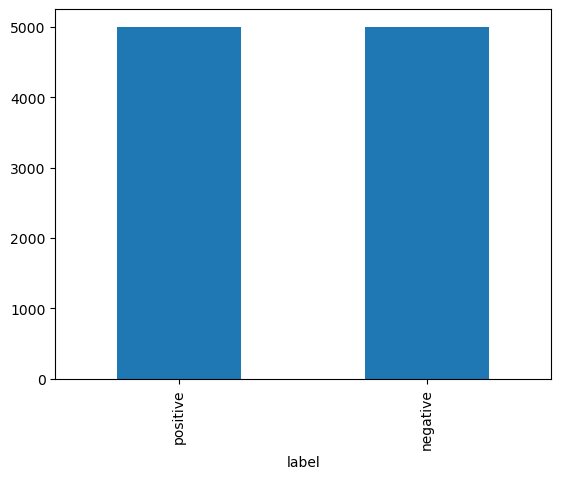

In [23]:
df['label'].value_counts().plot.bar()

In [9]:
# Write your code here. Add as many boxes as you need.
encoder = LabelEncoder()
labels = encoder.fit_transform(dataset['train']['label'])

dataset['train'] = dataset['train'].remove_columns('label')
dataset['train'] = dataset['train'].add_column('label', labels)
dataset = dataset.rename_column("review", "text")
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 10000
    })
})

In [11]:
dataset = dataset['train'].train_test_split(test_size=0.2)
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 8000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

## Tokenization
Tokenize the texts using the `AutoTokenizer` class.

In [13]:
# Write your code here. Add as many boxes as you need.
checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
tokenized_texts = tokenizer(dataset["train"]["text"], truncation=True, max_length=512)

text_tokens = [tokenizer.convert_ids_to_tokens(list) for list in tokenized_texts["input_ids"]]
# [print(sample_tokens) for sample_tokens in text_tokens]

for sample_tokens in text_tokens:
    print(sample_tokens)


['[CLS]', 'thank', 'you', '.', 'for', 'spot', '##ify', 'app', 'i', 'like', 'the', 'all', 'song', 'thank', 'you', '[SEP]']
['[CLS]', 'music', 'keeps', 'stopping', 'for', 'no', 'reason', '.', 'app', 'doesn', "'", 't', 'show', 'the', 'track', 'currently', 'played', '.', 'my', 'downloaded', 'play', '##lists', 'keep', 'on', 'trying', 'to', 'get', 'downloaded', 'but', 'are', 'only', 'partly', 'available', 'off', '##line', '.', '.', '.', 'very', 'frustrating', '.', '[SEP]']
['[CLS]', 'i', 'downloaded', 'spot', '##ify', 'for', 'music', 'not', 'podcast', '##s', '.', 'disappointed', 'that', 'i', "'", 'm', 'losing', 'favourite', 'artists', 'because', 'of', 'joe', 'ro', '##gan', '##s', 'bs', '.', 'time', 'to', 'try', 'out', 'tidal', '[SEP]']
['[CLS]', 'extremely', 'huge', 'fan', 'of', 'spot', '##ify', '.', 'the', 'local', 'music', 'that', 'i', 'can', "'", 't', 'believe', 'i', 'can', 'stream', 'and', 'download', 'is', 'out', 'of', 'this', 'world', '.', 'only', 'complaint', 'i', 'have', 'is', 'the',

In [15]:
def tokenize(sample):
    return tokenizer(sample["text"], truncation=True)

tokenizer = AutoTokenizer.from_pretrained(checkpoint)
tokenized_dataset = dataset.map(tokenize, batched=True)

Map:   0%|          | 0/8000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [18]:
[ print(sample) for sample in tokenized_dataset["train"]]

{'text': "I tried several apps for music so far it's far this is tied with the paid version of YouTube music", 'label': 0, 'input_ids': [101, 1045, 2699, 2195, 18726, 2005, 2189, 2061, 2521, 2009, 1005, 1055, 2521, 2023, 2003, 5079, 2007, 1996, 3825, 2544, 1997, 7858, 2189, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
{'text': "ð\x9d‘†ð\x9d‘\x9dð\x9d‘œð\x9d‘‘ð\x9d‘–ð\x9d‘“ð\x9d‘¦ ð\x9d‘–ð\x9d‘\xa0 ð\x9d‘”ð\x9d‘Ÿð\x9d‘’ð\x9d‘Žð\x9d‘¡, ð\x9d‘¡â„Žð\x9d‘’ ð\x9d‘œð\x9d‘›ð\x9d‘™ð\x9d‘¦ ð\x9d‘¡â„Žð\x9d‘–ð\x9d‘›ð\x9d‘” ð\x9d‘¡â„Žð\x9d‘Žð\x9d‘¡ ð\x9d‘– ð\x9d‘‘ð\x9d‘œð\x9d‘›'ð\x9d‘¡ ð\x9d‘™ð\x9d‘–ð\x9d‘˜ð\x9d‘’ ð\x9d‘–ð\x9d‘\xa0 ð\x9d‘¡â„Žð\x9d‘Žð\x9d‘¡ ð\x9d‘¤â„Žð\x9d‘’ð\x9d‘›ð\x9d‘’ð\x9d‘£ð\x9d‘’ð\x9d‘Ÿ ð\x9d‘¦ð\x9d‘œð\x9d‘¢ ð\x9d‘šð\x9d‘Žð\x9d‘˜ð\x9d‘’ ð\x9d‘\x9dð\x9d‘™ð\x9d‘Žð\x9d‘¦ð\x9d‘™ð\x9d‘–ð\x9d‘\xa0ð\x9d‘¡ð\x9d‘\xa0 ð\x9d‘–ð\x9d‘\xa0 ð\x9d‘\x

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [17]:
tokenized_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 8000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [31]:
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

## Fine-tuning a Pre-trained Language Model for Classification
Fine-tune a pre-trained language model for classification on the given dataset.

Define the model using the `AutoModelForSequenceClassification` class.

In [19]:
# Write your code here. Add as many boxes as you need.
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [21]:
import evaluate
import numpy as np

metric = evaluate.load("f1")

Define the traning parameters using the `TrainingArguments` class.

In [23]:
# Write your code here. Add as many boxes as you need.
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="trainer",
    eval_strategy="epoch",
    per_device_train_batch_size=8,  
    per_device_eval_batch_size=8, 
    metric_for_best_model="f1",
)

Define the training using the `Trainer` class.

In [27]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels, average="weighted")


In [33]:
from transformers import Trainer

trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    compute_metrics=compute_metrics,
    data_collator=data_collator,
)

Fine-tune (train) the pre-trained lanugage model.

Use the trained model to make predictions for the test set.

In [39]:
# Write your code here. Add as many boxes as you need.
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [41]:
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [ ]:
# Write your code here. Add as many boxes as you need.
trainer.train()


# Laboratory Exercise - Bonus Task (+ 2 points)

Implement a machine learning pipeline to classify Spotify user reviews as positive or negative. Use TF-IDF vectorization to transform the review text into numerical features, and train a logistic regression model on the transformed data. Split the dataset into training and testing sets, fit the pipeline on the training data, and evaluate its performance using metrics such as precision, recall, and F1-score. To gain insights into the most influential words or phrases associated with positive and negative reviews, analyze the coefficients from the logistic regression model trained on the TF-IDF features. Present the top keywords for each sentiment in a table or a bar chart to provide a clear understanding of the terms driving user feedback.

In [ ]:
# Write your code here. Add as many boxes as you need.